In [9]:
import polars as pl
import numpy as np

# 读取数据
data = pl.read_parquet("hourly_data.pa")

df = data.sort('open_time').sort("symbol")

df = df.with_columns([
    (pl.col('volume') - pl.col('taker_buy_volume')).alias('taker_sell_volume'),
    (pl.col('quote_volume') - pl.col('taker_buy_quote_volume')).alias('taker_sell_quote_volume'),
    (pl.col('close') / (pl.col('close').shift(1).over('symbol')) - 1).alias('return')
])

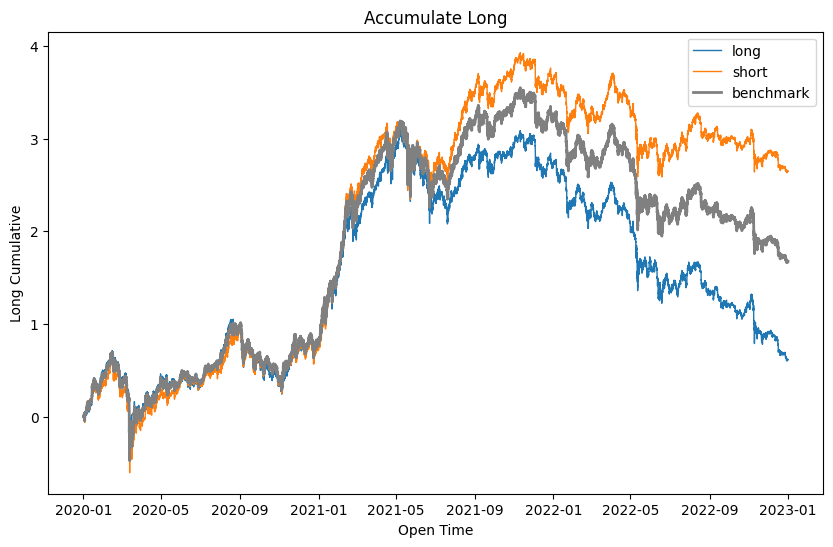

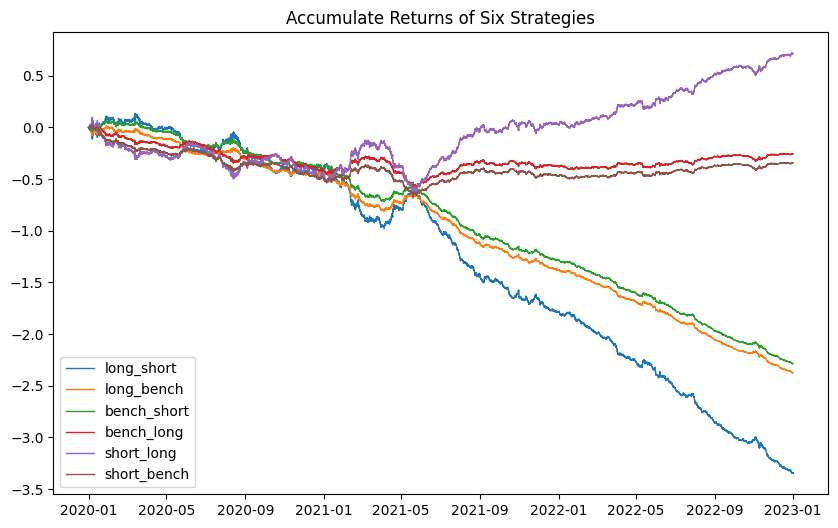

long: 
ann_return = 0.2045  sharpe = 0.1863  maxdd = 0.6564  calmar_ratio = 0.3115  

short: 
ann_return = 0.8812  sharpe = 0.8067  maxdd = 0.7544  calmar_ratio = 1.1681  

bench: 
ann_return = 0.5575  sharpe = 0.513  maxdd = 0.6895  calmar_ratio = 0.8085  

long_short: 
ann_return = -1.1147  sharpe = -4.1049  maxdd = 3.0687  calmar_ratio = -0.3632  

long_bench: 
ann_return = -0.791  sharpe = -5.7699  maxdd = 2.3558  calmar_ratio = -0.3358  

bench_long: 
ann_return = -0.085  sharpe = -0.6199  maxdd = 0.6292  calmar_ratio = -0.1351  

short_long: 
ann_return = 0.2387  sharpe = 0.879  maxdd = 0.7104  calmar_ratio = 0.336  

short_bench: 
ann_return = -0.1143  sharpe = -0.8384  maxdd = 0.6903  calmar_ratio = -0.1656  

bench_short: 
ann_return = -0.7617  sharpe = -5.5857  maxdd = 2.2093  calmar_ratio = -0.3448  



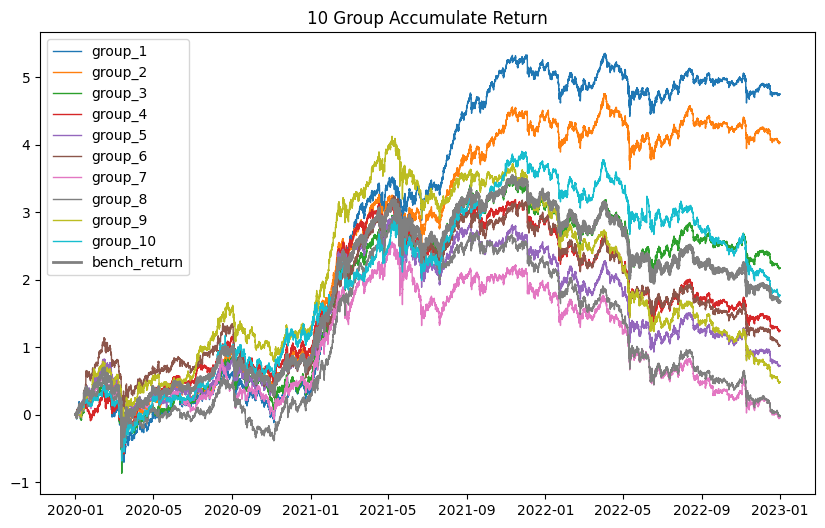

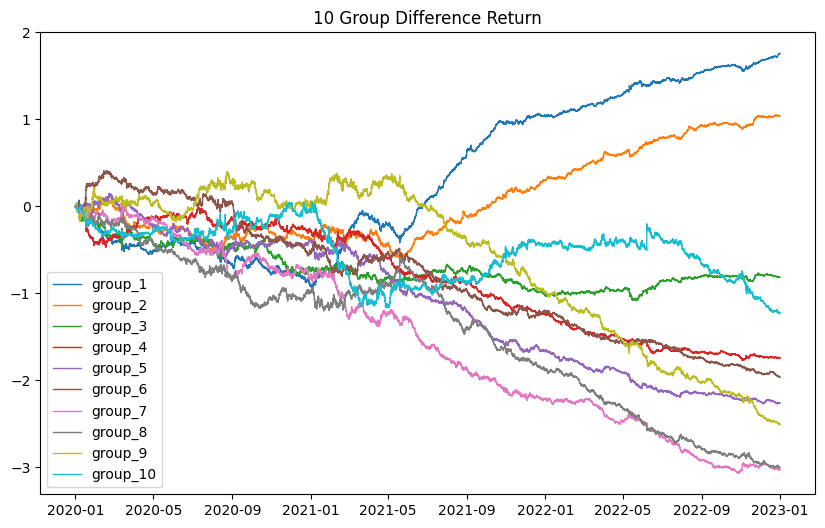

group_1: 
ann_return = 1.5812  sharpe = 1.4439  maxdd = 0.8974  calmar_ratio = 1.762  

group_2: 
ann_return = 1.3431  sharpe = 1.1867  maxdd = 0.6902  calmar_ratio = 1.946  

group_3: 
ann_return = 0.7235  sharpe = 0.6363  maxdd = 0.9109  calmar_ratio = 0.7943  

group_4: 
ann_return = 0.415  sharpe = 0.3678  maxdd = 0.7375  calmar_ratio = 0.5627  

group_5: 
ann_return = 0.2417  sharpe = 0.2133  maxdd = 0.6899  calmar_ratio = 0.3503  

group_6: 
ann_return = 0.341  sharpe = 0.2962  maxdd = 0.5932  calmar_ratio = 0.5749  

group_7: 
ann_return = -0.0127  sharpe = -0.0109  maxdd = 0.7346  calmar_ratio = -0.0172  

group_8: 
ann_return = -0.0064  sharpe = -0.0054  maxdd = 0.7543  calmar_ratio = -0.0084  

group_9: 
ann_return = 0.1611  sharpe = 0.1351  maxdd = 0.7133  calmar_ratio = 0.2258  

group_10: 
ann_return = 0.5888  sharpe = 0.5222  maxdd = 0.778  calmar_ratio = 0.7567  

-----------------------------------------
group_difference_1: 
ann_return = 0.5857  sharpe = 2.0341  maxdd =

In [10]:
factors = df.select(['open_time', 'symbol', 'quote_volume'])

from factor_analysis.factor_analysis import FactorAnalysis

# 使用示例
analysis = FactorAnalysis(factors, data)
analysis.run_full_analysis()